In [1]:
'''
Domain: Real Estate

Difficulty: Easy to Medium

Challenges:

    Missing value treatment
    Outlier treatment
    Understanding which variables drive the price of homes in Boston

Summary:
The Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.
'''

'\nDomain: Real Estate\n\nDifficulty: Easy to Medium\n\nChallenges:\n\n    Missing value treatment\n    Outlier treatment\n    Understanding which variables drive the price of homes in Boston\n\nSummary:\nThe Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load your file
df = pd.read_csv('HousingData.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of the column
df = df.fillna(df.mean())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


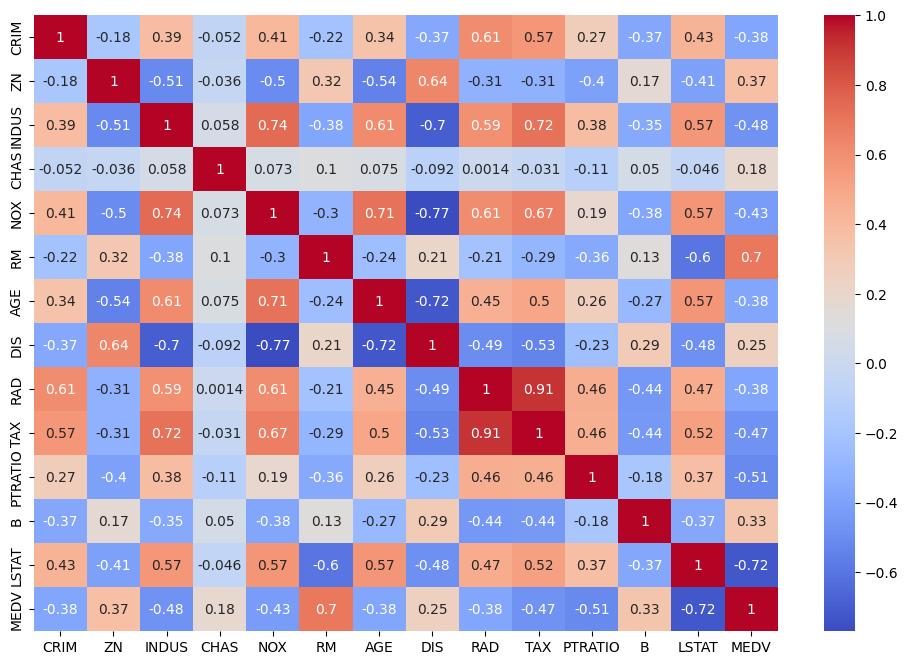

In [6]:
#Exploratory Data Analysis (EDA)
#It’s helpful to see which features actually correlate with the price (MEDV). A correlation matrix is the fastest way to visualize this.

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
# X = all columns except the price, y = the price
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

         CRIM         ZN  INDUS  CHAS     NOX     RM        AGE     DIS  RAD  \
477  15.02340   0.000000  18.10   0.0  0.6140  5.304  97.300000  2.1007   24   
15    0.62739   0.000000   8.14   0.0  0.5380  5.834  56.500000  4.4986    4   
332   0.03466  11.211934   6.06   0.0  0.4379  6.031  23.300000  6.6407    1   
423   7.05042   0.000000  18.10   0.0  0.6140  6.103  68.518519  2.0218   24   
19    0.72580   0.000000   8.14   0.0  0.5380  5.727  69.500000  3.7965    4   
..        ...        ...    ...   ...     ...    ...        ...     ...  ...   
106   0.17120   0.000000   8.56   0.0  0.5200  5.836  91.900000  2.2110    5   
270   0.29916  20.000000   6.96   0.0  0.4640  5.856  42.100000  4.4290    3   
348   0.01501  80.000000   2.01   0.0  0.4350  6.635  29.700000  8.3440    4   
435  11.16040   0.000000  18.10   0.0  0.7400  6.629  94.600000  2.1247   24   
102   0.22876   0.000000   8.56   0.0  0.5200  6.405  85.400000  2.7147    5   

     TAX  PTRATIO       B  LSTAT  
477 

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


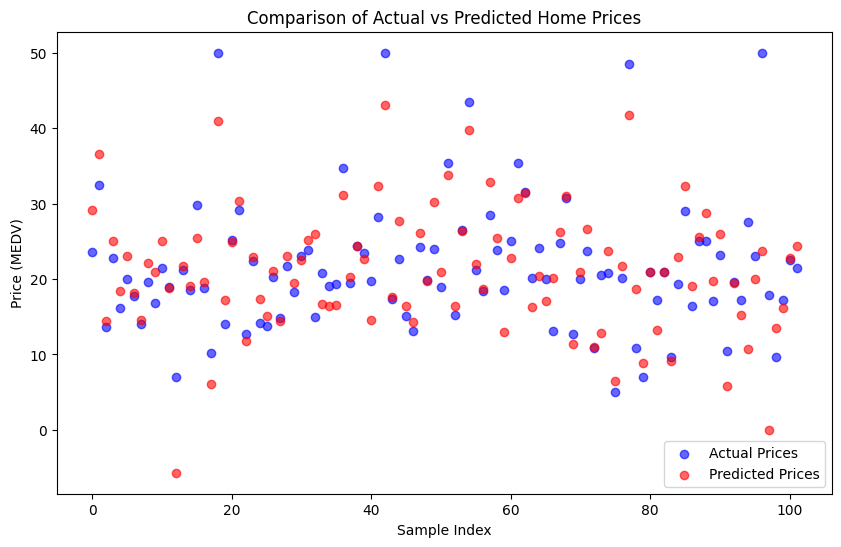

In [13]:
# Create a plot to compare Actual vs Predicted
plt.figure(figsize=(10, 6))

# Plotting Actual values in Blue
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices', alpha=0.6)

# Plotting Predicted values in Red
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Prices', alpha=0.6)

plt.title('Comparison of Actual vs Predicted Home Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price (MEDV)')
plt.legend()
plt.show()

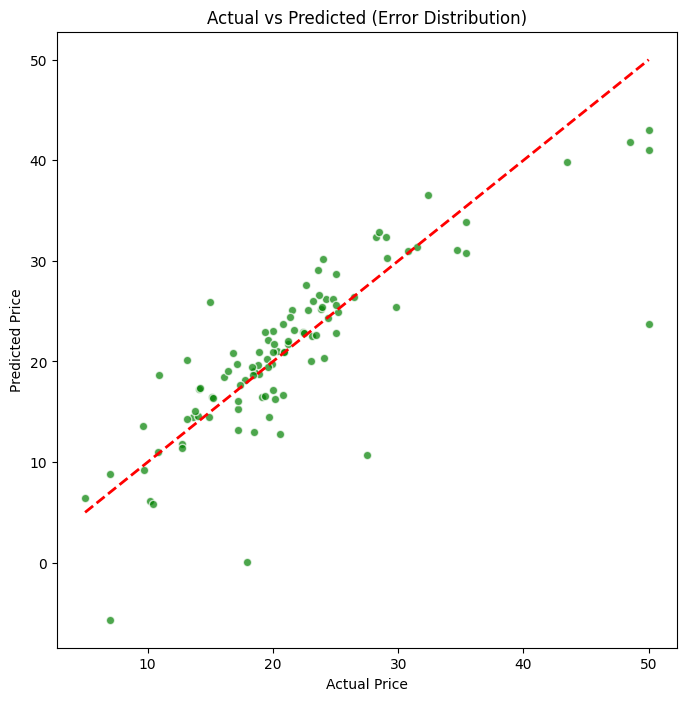

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='green', edgecolors='white', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # The "Perfect Prediction" line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Error Distribution)')
plt.show()